### Advanced DICOM Handling in Radiation Therapy Using **rosamllib**

---

### **Summary**:
This tutorial introduces the **rosamllib** Python library, a tool designed for efficient and advanced handling of DICOM files in radiation therapy. It covers the following key features:

1. **Installation**: Setting up the environment to use rosamllib.
2. **DICOM Data Management**: Loading and querying DICOM datasets.
3. **Visualization**: Interactive tools for image visualization and Dose-Volume Histogram (DVH) analysis.
4. **Hands-on Examples**: Demonstrations with real DICOM datasets, showcasing the library’s capabilities.


### Installation

Before diving into the functionalities of **rosamllib**, ensure the library is installed and up-to-date. Use the command below to install the library:

```python
%pip install rosamllib --upgrade
```
This will install the library along with any dependencies required for its advanced DICOM handling features.

#### Installing Graphviz

To enable visualization of series references using **rosamllib**, the **Graphviz** software must be installed on your system. This is separate from the Python package and can be installed as follows:

- **Windows**: 
  Download the installer from [Graphviz Download Page](https://graphviz.org/download/) and follow the installation instructions. Make sure to add Graphviz to your system PATH during installation.

- **Linux**:
  Use your package manager to install Graphviz:
  ```bash
  sudo apt-get install graphviz

In [1]:
# %pip install rosamllib --upgrade

### Library Imports and Initial Setup

We start by importing the necessary libraries:

- **rosamllib**: The main library for DICOM management and visualization.
- **SimpleITK**: A library for medical image processing.
- **matplotlib**: For plotting and visualization.
- **pathlib**: To handle file and directory paths.

Additionally, set the matplotlib plotting style for consistency:

In [2]:
import rosamllib
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt
from rosamllib.readers import DICOMLoader
from pathlib import Path
from rosamllib.viewers import interactive_image_viewer, dvh_viewer
plt.style.use('default')
rosamllib.__version__

'0.4.5'

### Defining the Data Path

Set the path to the directory containing the DICOM datasets. Ensure the path is accessible, especially if it resides on a network-shared location:

Modify this path as needed to point to your local or networked dataset.

In [3]:
data_path = Path(r"D:\GDP_Challenge_datasets\Radiotherapy_HaN_Lung_AIRTP\DICOM_data")

### Metadata Tags for Indexing

Specify the DICOM tags to be indexed when loading the datasets. These tags help in querying and organizing the data efficiently:

These tags capture essential metadata for radiotherapy planning and delivery datasets.

In [4]:
tags_to_index=[
    "StudyDate", 
    "StudyDescription", 
    "SeriesDate", 
    "SeriesDescription", 
    "BodyPartExamined", 
    "Manufacturer", 
    "ManufacturerModelName", 
    "InstitutionName", 
    "PhysiciansOfRecord", 
    "ReferringPhysicianName", 
    "OperatorsName", 
    "ImageOrientationPatient", 
    "ImagePositionPatient",
    "SpacingBetweenSlices", 
    "RTPlanLabel", 
    "RTPlanDate", 
    "PlanIntent", 
    "TreatmentMachineName", 
    "ApprovalStatus", 
    "ReviewerName", 
    ]

### Loading the DICOM Data

The **DICOMLoader** class in **rosamllib** provides robust capabilities for loading and organizing DICOM data. Initialize the loader with the data path and load the datasets with the specified tags.

This step ensures that all relevant DICOM files are loaded into memory, indexed by the specified tags for easy access and querying.

In [5]:
loader = DICOMLoader(data_path)
loader.load(tags_to_index)

Scanning directories: 0it [00:00, ?it/s]

Found 225859 files.


Loading DICOM files:   0%|          | 0/225859 [00:00<?, ?file/s]

In [6]:
# The `loader.get_summary()` method provides a concise overview of the loaded DICOM dataset.
loader.get_summary()

{'total_patients': 1494,
 'total_studies': 1494,
 'total_series': 8506,
 'total_instances': 225859}

In [7]:
# The `loader.get_modality_distribution()` method displays the distribution of different imaging modalities (e.g., CT, MR, RTSTRUCT) in the dataset.
loader.get_modality_distribution()

{'CT': 1494, 'RTDOSE': 2759, 'RTPLAN': 2759, 'RTSTRUCT': 1494}

In [8]:
# The`loader.get_patient_ids()` method retrieves all patient IDs in the loaded dataset. These IDs can be used for querying specific patient data or exploring series references.
pt_ids = loader.get_patient_ids()

### Visualizing Series References

The **`loader.visualize_series_references()`** method provides a graphical view of the relationships between series for a given patient. This includes references such as:
- RTSTRUCT → RTDOSE → RTPLAN.
- CT and other imaging modalities linked by the Frame of Reference UID.

This tool is especially useful for:
* Understanding the linkages between various DICOM entities for a specific patient.
* Verifying data completeness in radiotherapy workflows.
The visualization simplifies navigating complex relationships in multi-modality DICOM datasets.

Tip: To learn more about this method or any other method in rosamllib, use the help function in Jupyter:
```python
help(loader.visualize_series_references)
```
This command displays the method's documentation, including details about its parameters and usage

In [28]:
indx = -1

0


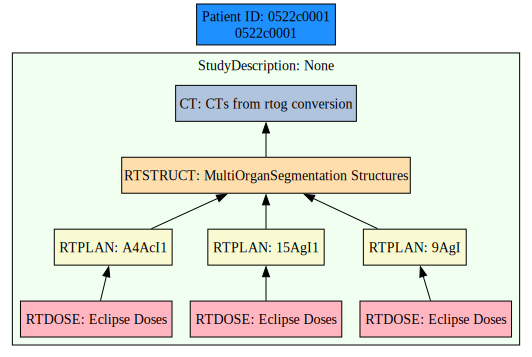

In [29]:
indx += 1
print(indx) 
# visualize series references for a given patient
loader.visualize_series_references(patient_id=pt_ids[indx], include_uid=False)

### Extracting Series and Referenced Data for a Patient

To access series and associated referenced data for a specific patient, we now use the generalized utility functions:

#### Key Functions:
- `DICOMLoader.get_nodes_for_patient(patient_node, level, modality=None)`: Retrieves nodes (Study, Series, or Instance) under a patient, filtered by level and optionally modality.
- `DICOMLoader.get_referenced_nodes(node, modality, level, recursive=True)`: Retrieves directly or indirectly referenced nodes of a given type and modality from any instance or series node.
- `loader.read_series(SeriesInstanceUID)`: Reads a DICOM series and returns one or more associated objects.
- `loader.read_instance(SOPInstanceUID)`: Reads a single DICOM instance (e.g., RTSTRUCT, RTDOSE, RTPLAN).


In [30]:
# Get a patient node
patient_node = loader.get_patient(pt_ids[indx])

# Get all series for this patient
all_series = DICOMLoader.get_nodes_for_patient(patient_node, level="SERIES")
all_series

[SeriesNode(SeriesInstanceUID='1.3.6.1.4.1.22213.2.26555.2', Modality='CT', SeriesDescription='CTs from rtog conversion', NumInstances=107),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.264841.20241114185421', Modality='RTDOSE', SeriesDescription='Eclipse Doses', NumInstances=1),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.284001.20241118151657', Modality='RTDOSE', SeriesDescription='Eclipse Doses', NumInstances=1),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.284037.20241118151920', Modality='RTDOSE', SeriesDescription='Eclipse Doses', NumInstances=1),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.264840.20241114185418', Modality='RTPLAN', SeriesDescription='A4AcI1', NumInstances=1),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.284000.20241118151648', Modality='RTPLAN', SeriesDescription='15AgI1', NumInstances=1),
 SeriesNode(SeriesInstanceUID='1.2.246.352.71.2.413130124983.284036.20241118151920', Modality

In [31]:
# Get all RTDOSE instances and pick the first one
doses = DICOMLoader.get_nodes_for_patient(patient_node, level="INSTANCE", modality="RTDOSE")
dose0 = doses[0]

# Recursively find the CT, RTSTRUCT, and RTPLAN referenced by this RTDOSE
ref_ct = DICOMLoader.get_referenced_nodes(dose0, modality="CT", level="SERIES", recursive=True)[0]
ref_struct = DICOMLoader.get_referenced_nodes(dose0, modality="RTSTRUCT", level="INSTANCE", recursive=True)[0]
ref_plan = DICOMLoader.get_referenced_nodes(dose0, modality="RTPLAN", level="INSTANCE", recursive=True)[0]

In [32]:
# Read the CT, the RTDose, RTStruct and RTPlan
ct_image = loader.read_series(ref_ct.SeriesInstanceUID)[0]
dose = loader.read_instance(dose0.SOPInstanceUID)
rtstruct = loader.read_instance(ref_struct.SOPInstanceUID)
rtplan = loader.read_instance(ref_plan.SOPInstanceUID)

### Resampling the Dose to CT Image Grid

The dose distribution often needs to be resampled to match the CT image grid for accurate overlay and analysis.

Explanation:
* `dose.resample_dose_to_image_grid(ct_image)`: Aligns the dose grid with the spatial resolution and orientation of the CT image.
* `res_dose.get_dose_array()`: Extracts the dose values as a NumPy array for further processing or visualization.
This step ensures consistency between dose and image data for visualization and analysis.

In [33]:
# resample the dose to the ct image grid
res_dose = dose.resample_dose_to_image_grid(ct_image)
res_dose_array = res_dose.get_dose_array()

### Extracting Structure Masks

To visualize ROIs, we extract structure masks from the RTSTRUCT and align them with the CT image grid.

Explanation:

* `rtstruct.set_referenced_image(ct_image)`: Links the RTSTRUCT to the CT image for proper spatial alignment.
* `rtstruct.get_structure_names()`: Retrieves the names of all structures in the RTSTRUCT.
* `rtstruct.get_structure_mask(structure)`: Extracts the binary mask for each structure.
* `rtstruct.get_structure_color(structure)`: Retrieves the color assigned to each structure.

The resulting `structure_masks` dictionary contains:

* `mask`: Binary mask as a NumPy array (1 for the structure, 0 for the background).
* `color`: The assigned visualization color.

In [35]:
# get the structure masks as numpy array for all structures in the rtstruct
rtstruct.set_referenced_image(ct_image)
structures = rtstruct.get_structure_names()
structure_masks = {}
for structure in structures:
    structure_masks[structure] = {"mask": sitk.GetArrayFromImage(rtstruct.get_structure_mask(structure)),
                                  "color": rtstruct.get_structure_color(structure)}

### Visualizing the CT Image with Structures and Dose Overlay

Finally, we use the `interactive_image_viewer` function to visualize the CT image, structure masks, and dose distribution.

In [38]:
# use the interactive image viewer function to visualize the ct image with all the structures and the dose distribution overlayed
ct_image_array = sitk.GetArrayFromImage(ct_image)
interactive_image_viewer(ct_image, masks=structure_masks, dose_array=res_dose_array, dose_units=res_dose.DoseUnits, cmap='grey', axis=2, origin='lower')

IntSlider(value=256, description='Slice', max=511)

### Preparing Structure Masks for DVH Visualization

To compute and visualize Dose-Volume Histograms (DVHs), structure masks must be in SimpleITK image format. The following code prepares these masks.

Explanation:
* `rtstruct.get_structure_mask(structure)`: Retrieves the binary mask for each structure as a SimpleITK image.
* `structure_masks_dvh`: A dictionary with structure names as keys and corresponding masks as values.

This format is essential for accurate DVH calculations, as it retains spatial and geometric information.


In [39]:
# get the structure masks in SimpleITK image format for DVH visualizations
structure_masks_dvh = {}
for structure in structures:
    structure_masks_dvh[structure] = rtstruct.get_structure_mask(structure)

### Visualizing Dose-Volume Histograms (DVHs)

The `dvh_viewer` function in **rosamllib** provides an interactive way to visualize DVHs for multiple structures. The following example demonstrates its usage:


In [42]:
# visualize the DVHs
prescription_dose = rtplan.plan_dataset.DoseReferenceSequence[0].TargetPrescriptionDose
dvh_viewer(res_dose, structure_masks_dvh, prescription_dose=prescription_dose, bin_width=0.01, template="seaborn")

### Filtering Approved Plans Since 2015 (Excluding Boost Plans)

The `loader.query` method allows filtering datasets based on various criteria. In this example, we filter for:
- **Modality**: RTPLAN.
- **Study Date**: On or after January 1, 2015.
- **Approval Status**: Approved plans only.
- **RT Plan Label**: Excludes plans starting with "B" or "b" using a regular expression.

Explanation:

* `query_level`: Specifies the granularity of the query (INSTANCE level retrieves individual instances).
* `StudyDate`: Filters for plans created on or after January 1, 2015 (gte means "greater than or equal to").
* `RTPlanLabel`: Uses a RegEx to exclude plan labels beginning with "B" or "b".

**Output**: The result is a Pandas DataFrame containing RT Plans that match the criteria. Use .head() to view the first few rows for validation.

Tip: To explore more about the query method, run:
```python
help(loader.query)
```

The filter is applied as follows:

In [53]:
# filter for approved plans since 2015 that are not boost plans
# to get more information on how to use the query method, run help(loader.query)
filters = {
    "Modality": "RTPLAN", 
    "StudyDate": "*",
    "StudyDate": {"gte":"2000-01-01"}, 
    # "ApprovalStatus":"APPROVED", 
    "RTPlanLabel":{"RegEx": r"^(?![bB]).*"}, # uses regular expression to filter out b* and B*
    }
filtered_df = loader.query(query_level="INSTANCE", **filters)
filtered_df.head()

,SOPInstanceUID,RTPlanLabel,Modality,PatientID,SeriesInstanceUID,StudyDate,StudyInstanceUID
0,1.2.246.352.71.5.413130124983.235268.202411142...,A4AcI1,RTPLAN,0522c0014,1.2.246.352.71.2.413130124983.264900.202411142...,2000-01-09,1.3.6.1.4.1.22213.2.26561
1,1.2.246.352.71.5.413130124983.246456.202411181...,15AgI,RTPLAN,0522c0014,1.2.246.352.71.2.413130124983.285136.202411181...,2000-01-09,1.3.6.1.4.1.22213.2.26561
2,1.2.246.352.71.5.413130124983.246532.202411181...,9AgI1,RTPLAN,0522c0014,1.2.246.352.71.2.413130124983.285278.202411181...,2000-01-09,1.3.6.1.4.1.22213.2.26561
3,1.2.246.352.71.5.413130124983.235278.202411142...,A4AcI1,RTPLAN,0522c0017,1.2.246.352.71.2.413130124983.264910.202411142...,2000-01-11,1.3.6.1.4.1.22213.2.26563
4,1.2.246.352.71.5.413130124983.246583.202411181...,15AgI1,RTPLAN,0522c0017,1.2.246.352.71.2.413130124983.285350.202411181...,2000-01-11,1.3.6.1.4.1.22213.2.26563


### Visualizing RT Plan Creation Trends by Year

To understand trends in RT Plan creation over time, group the filtered DataFrame by year and visualize the yearly counts using a bar chart:


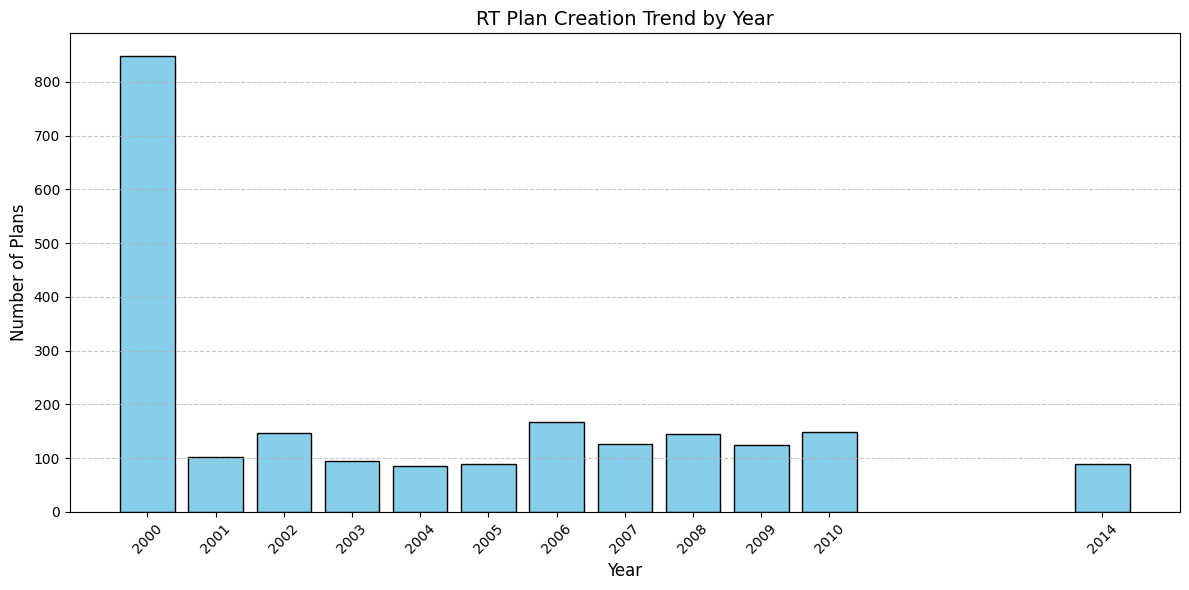

In [54]:
# plot the yearly plan counts
yearly_plan_counts = filtered_df.groupby(filtered_df["StudyDate"].dt.year).size()
plt.figure(figsize=(12,6))
plt.bar(yearly_plan_counts.index, yearly_plan_counts.values, color="skyblue", edgecolor="black")
plt.title("RT Plan Creation Trend by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Plans", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.xticks(yearly_plan_counts.index, rotation=45)
plt.tight_layout()
plt.show()